In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

EDA notebook to get general sense of visualizations
- Template for what to base javascript graphs

### 1st Visualization

In [4]:
forest_area = pd.read_excel('Data\deforestation_data.xlsx', sheet_name='Forest Area')

# --------------
# Variables
# --- Area [in 1000 hectares]
# --- Year [from 1990 - 2020] --> not evenly spaced

# forest_area.to_csv("forest_area.csv", index=False)

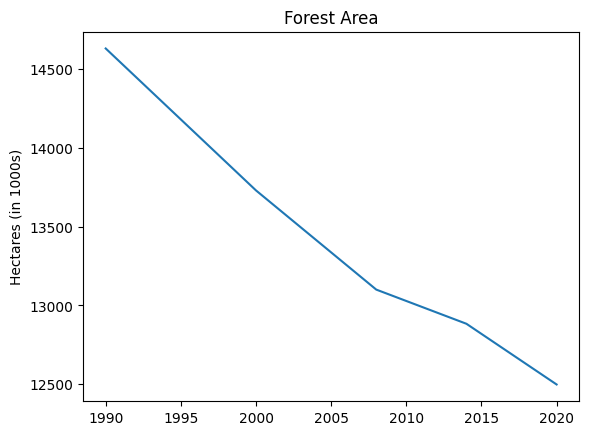

In [5]:
plt.plot(forest_area['Year'], forest_area['Area'])
plt.title('Forest Area')
plt.ylabel('Hectares (in 1000s)')
plt.show()

In [6]:
wood_exports = pd.read_excel('Data\deforestation_data.xlsx', sheet_name='Export - Rough Wood')

# --------------
# Variables
# --- Value [in millions USD]
# --- Year [2016, 2018, 2021] --> not evenly spaced

# wood_exports.to_csv("wood_exports.csv", index=False)

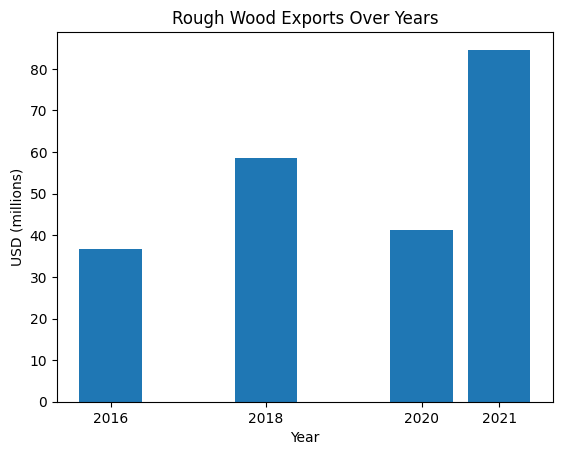

In [7]:
plt.bar(wood_exports['Year'], wood_exports['Value'])
plt.title('Rough Wood Exports Over Years')
plt.xlabel('Year')
plt.ylabel('USD (millions)')

# Set the x-axis ticks to only include the years present in your data
plt.xticks(wood_exports['Year'])
plt.show()

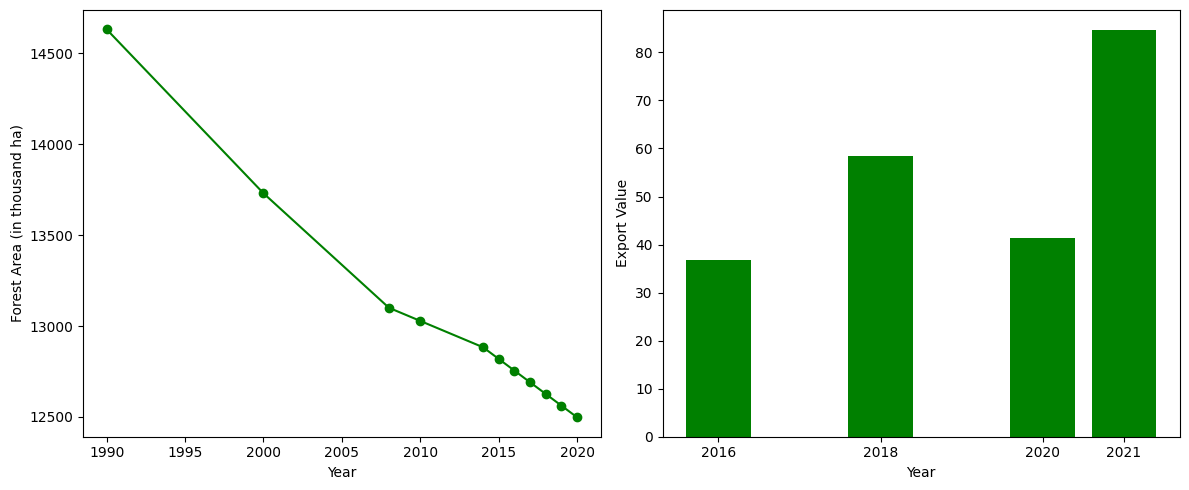

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# bar chart for rough wood exports
axs[1].bar(wood_exports['Year'], wood_exports['Value'], color='green')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Export Value')
axs[1].set_xticks(wood_exports['Year'])  

# line chart for forest area
axs[0].plot(forest_area['Year'], forest_area['Area'], marker='o', color='green')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Forest Area (in thousand ha)')

plt.tight_layout()
plt.show()

### 2nd Visualization

In [9]:
annual_co2 = pd.read_excel('Data\deforestation_data.xlsx', sheet_name='Annual CO2 Emissions')

# --------------
# Variables
# --- Annual CO2 Emissions [in millions tonnes]
# --- Year [2000 - 2021]

# annual_co2.to_csv("annual_co2_emissions.csv", index=False)

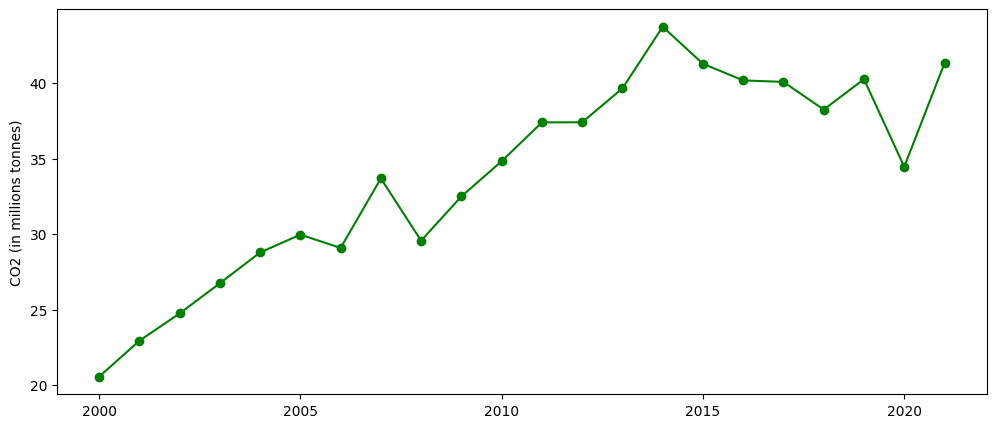

In [10]:
fig,ax = plt.subplots(figsize=(12, 5))
ax.plot(annual_co2['Year'], annual_co2['Annual CO2 Emissions (million tonnes)'], marker='o', color='green')
ax.set_ylabel('CO2 (in millions tonnes)')
plt.show()

### 3rd Visualization

In [12]:
# Calculate the loss of potential CO2 sequestration via trees in forest of Ecuador 

# Step 1 --- Determine lost forest in thousands of hectares
# ----- forest_area['Area'].diff()

# Step 2 --- Convert to hectares 
# ----- mulitply by 1000

# Step 3 --- Convert to millions of tonnes CO2
# ----- divide by 11/1e6

## conversion factor ---> 11 tonnes/ha
potential_sequestration = pd.DataFrame()
potential_sequestration['Year'] = forest_area['Year']
potential_sequestration['Years to Date'] = np.abs(potential_sequestration['Year'] - potential_sequestration['Year'].iloc[-1])
potential_sequestration['CO2 Sequestration Potential'] = np.abs(forest_area['Area'].diff()*1000*11 / 1e6)
potential_sequestration['CO2 Sequestration Potential'] = np.where(potential_sequestration['CO2 Sequestration Potential'].isna(), 0, potential_sequestration['CO2 Sequestration Potential'])
potential_sequestration

,Year,Years to Date,CO2 Sequestration Potential
0,1990,30,0.00000
1,2000,20,9.91881
2,2008,12,6.92934
3,2010,10,0.79607
4,2014,6,1.59203
5,2015,5,0.70708
6,2016,4,0.70697
7,2017,3,0.70697
8,2018,2,0.70697
9,2019,1,0.70697


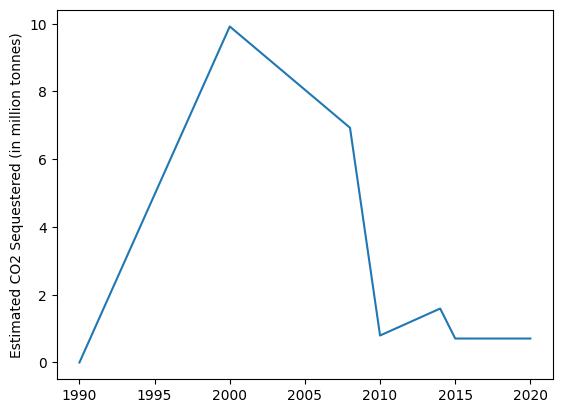

In [13]:
plt.plot(potential_sequestration['Year'], potential_sequestration['CO2 Sequestration Potential'])
plt.ylabel('Estimated CO2 Sequestered (in million tonnes)')
plt.show()

In [14]:
# creating matrix of years (except for 1990)
lst = [2000, 2008, 2010, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
year_diff_matrix = np.zeros((len(lst), len(lst)))

# matrix shows difference between the year of the row between other data points
for ind_row, row in enumerate(lst):
    for ind_col, col in enumerate(lst):
        if row == col:
            year_diff_matrix[ind_row][ind_col] = 1
        elif row < col:
            year_diff_matrix[ind_row][ind_col] = col-lst[ind_col-1]

#print(year_diff_matrix)

# each row (year) is multiplied by its respective CO2 sequestration potential to get the savings up to the point in time for its given rate
for i in range(0, len(year_diff_matrix)):
    year_diff_matrix[i,:] = year_diff_matrix[i,:] * potential_sequestration['CO2 Sequestration Potential'][1:].iloc[i]

#print(year_diff_matrix)

year_sums = [0]

# sums each columns to get the potential CO2 sequestered at that point in time
# considering all previous trees that were chopped down
for column in range(0, len(year_diff_matrix)):
    year_sums += [np.sum(year_diff_matrix[:,column])]

print(year_sums)

potential_sequestration['Year Sums'] = year_sums # in millones tonnes CO2
potential_sequestration['Year Sums Cum'] = potential_sequestration["Year Sums"].cumsum()
potential_sequestration
#potential_sequestration.to_csv('potential-co2-sequestration.csv', index=False)

[0, 9.918809999999988, 86.27981999999992, 34.49236999999997, 72.16890999999994, 19.943329999999985, 20.65029999999999, 21.357269999999996, 22.06423999999998, 22.771209999999986, 23.47817999999999]


,Year,Years to Date,CO2 Sequestration Potential,Year Sums,Year Sums Cum
0,1990,30,0.00000,0.00000,0.00000
1,2000,20,9.91881,9.91881,9.91881
2,2008,12,6.92934,86.27982,96.19863
3,2010,10,0.79607,34.49237,130.69100
4,2014,6,1.59203,72.16891,202.85991
5,2015,5,0.70708,19.94333,222.80324
6,2016,4,0.70697,20.65030,243.45354
7,2017,3,0.70697,21.35727,264.81081
8,2018,2,0.70697,22.06424,286.87505
9,2019,1,0.70697,22.77121,309.64626


In [16]:
pd.DataFrame(year_diff_matrix)

,0,1,2,3,4,5,6,7,8,9
0,9.91881,79.35048,19.83762,39.67524,9.91881,9.91881,9.91881,9.91881,9.91881,9.91881
1,0.00000,6.92934,13.85868,27.71736,6.92934,6.92934,6.92934,6.92934,6.92934,6.92934
2,0.00000,0.00000,0.79607,3.18428,0.79607,0.79607,0.79607,0.79607,0.79607,0.79607
3,0.00000,0.00000,0.00000,1.59203,1.59203,1.59203,1.59203,1.59203,1.59203,1.59203
4,0.00000,0.00000,0.00000,0.00000,0.70708,0.70708,0.70708,0.70708,0.70708,0.70708
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.70697,0.70697,0.70697,0.70697,0.70697
6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.70697,0.70697,0.70697,0.70697
7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.70697,0.70697,0.70697
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.70697,0.70697
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.70697


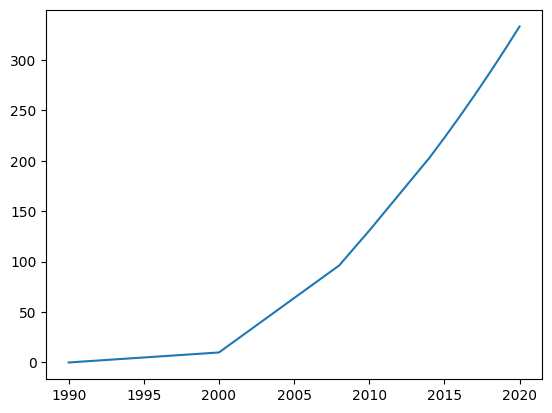

In [118]:
plt.plot(potential_sequestration['Year'], potential_sequestration['Year Sums'].cumsum())
plt.show()

# intent of graph is to show the compounding nature of lost CO2 sequestration potential 
# following many years after removal